In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pendulumODE as p
#import myPythonCheck
import argparse
import stepper
from stepper import Stepper     # ODE stepping algorithm
import pendulumODE as p         # ODE specific functions

In [2]:
def main(y0, parameters, dt, tMax, sMethod, ofname):
    """ Solve the initial-value ODE problem for a simple pendulum using various
        fixed step-size stepping algorithms

        y0:         Initial values array (theta0, omega0)
        parameters: Parameters list (g, l)
        dt:         Time-step in seconds
        tMax:       Evolve ODE until time tMax (in seconds)
        sMethod:    Stepper method
        ofname:     Output file name               """

    ofile = open(ofname, "w")
    E0 = p.Energy(y0, parameters)      # Initial energy - hopefully this is conserved and does not change.
    y  = np.copy(y0)                   # Copy initial values to initial "state-vector'

    istep = 0
    t = 0.0
    t_values = [t]
    energy_values = [E0] #Storing energy values
    theta_values = [y[0]]
# Write header and initial conditions to output file
    p.PrintHeader(ofile)
    p.PrintStep(y, parameters, t, istep, E0, ofile)

    while t < tMax:
# Calculate one time-step advanced theta and angular velocity
# of pendulum using chosen method while total elapsed time does not exceed tMax
        y, t, istep = Stepper(y, dt, parameters, istep, sMethod)
        p.PrintStep(y, parameters, t, istep, E0, ofile)

    p.PrintState(y, parameters, t, istep, E0)

    t_values.append(t)
    energy_values.append(p.Energy(y, parameters))
    theta_values.append(y[0])

    ofile.close()

if __name__ == '__main__':

    #myPythonCheck.Check()   #  Enforce use of python3

    parser = argparse.ArgumentParser(description="Pendulum Motion")
    parser.add_argument("-a", "--a",  type=float, default=np.pi/4.0, help="Initial launch angle (rad)")
    parser.add_argument("-w", "--w",  type=float, default=0.0,  help="Initial angular velocity (rad/s)")
    parser.add_argument("-g", "--g",  type=float, default=9.80, help="Acceleration due to gravity (m/s^2)")
    parser.add_argument("-l", "--l",  type=float, default=1.2,  help="Pendulum length (m)")
    parser.add_argument("-d", "--dt", type=float, default=0.01, help="Time-step (s)")
    parser.add_argument("-t", "--t",  type=float, default=20.0, help="Evolution duration (s)")
    parser.add_argument("-s", "--s",  type=int,   default=2,    help="Stepper method (0=Euler, 2=RK2)")
    parser.add_argument("-f", "--f",  type=str,   default="pendulum.dat", help="Output file name")

    args=parser.parse_args()
    print('Found argument list: ',args)

    y0 = np.array( [ args.a, args.w ])   # The initial values for (theta, omega)
    parameters = [args.g, args.l]        # The problem parameters (g, l)

    main(y0, parameters, args.dt, args.t, args.s, args.f)

Found argument list:  Namespace(a=0.7853981633974483, w=0.0, g=9.8, l=1.2, dt=0.01, t=20.0, s=2, f='/root/.local/share/jupyter/runtime/kernel-0a6f5503-74e4-4f2e-b9fe-fe0ba2dd861c.json')

End state  20.0 [-0.01096892  2.18729996]
End time:  20.0 s  angle: -0.010968922000820641 rad
End angular speed is  2.187299964216209  rad/s 
End energy ratio  1.0002803432765583
t,istep 20.0 2000


**Time Period Estimation**

In [3]:
from pendulumODE import T0
from pendulumODE import Texact

parameters = [9.80, 1.5]  # g and l
y0 = [np.radians(50), 0]  # initial angle and angular velocity

t0 = T0(parameters)
t = Texact(parameters, y0)

print(f"Approximation for small amplitude T0 = {t0:.6f} s")
print(f"Exact period T  = {t:.6f} s")
print(f"Difference: {(t - t0):.6f} s")
print(f"Ratio T/T0: {t/t0:.6f}")

Approximation for small amplitude T0 = 2.458173 s
Exact period T  = 2.580548 s
Difference: 0.122375 s
Ratio T/T0: 1.049783


**RK4 Method**

In [4]:
# Set up parameters
dt = 0.01
tMax = 20.0

sMethod = 4  # Use RK4 method
ofname = "pendulum_rk4.dat"

# Run the simulation
main(y0, parameters, dt, tMax, sMethod, ofname)


End state  20.0 [1.62296606e-03 2.16045319e+00]
End time:  20.0 s  angle: 0.0016229660593336248 rad
End angular speed is  2.160453192981916  rad/s 
End energy ratio  0.9999999945487286
t,istep 20.0 2000


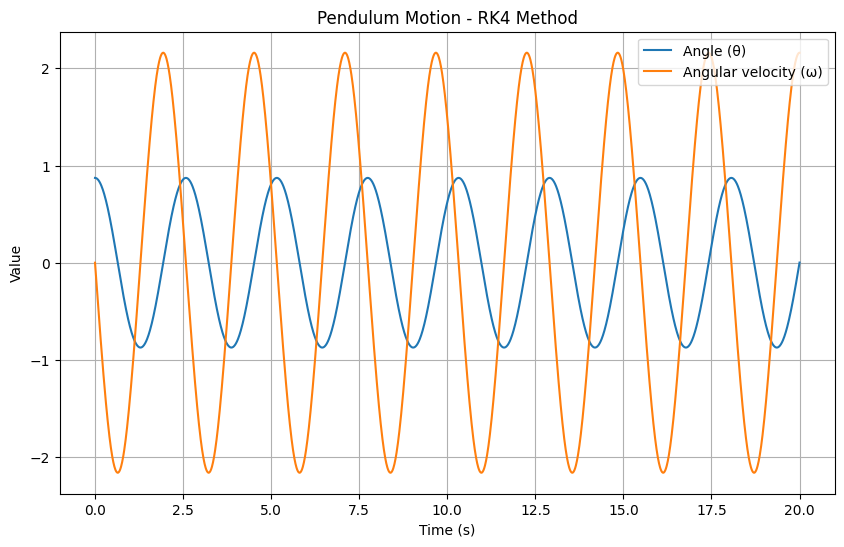

In [5]:
data_rk4 = np.loadtxt("pendulum_rk4.dat")
t_rk4 = data_rk4[:, 1]
theta_rk4 = data_rk4[:, 2]
omega_rk4 = data_rk4[:, 3]

plt.figure(figsize=(10, 6))
plt.plot(t_rk4, theta_rk4, label='Angle (θ)')
plt.plot(t_rk4, omega_rk4, label='Angular velocity (ω)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Pendulum Motion - RK4 Method')
plt.legend()
plt.grid(True)
plt.show()

**Method Comparison**

In [6]:
print('For Euler Method:')
sMethod = 0  # Use Euler method
ofname = "pendulum_euler.dat"
main(y0, parameters, dt, tMax, sMethod, ofname)

print('For RK2 Method:')
sMethod = 2  # Use RK2 method
ofname = "pendulum_rk2.dat"
main(y0, parameters, dt, tMax, sMethod, ofname)

For Euler Method:

End state  20.0 [-1.25655306 -2.03336526]
End time:  20.0 s  angle: -1.2565530643033849 rad
End angular speed is  -2.0333652582071564  rad/s 
End energy ratio  2.8199599132535966
t,istep 20.0 2000
For RK2 Method:

End state  20.0 [0.00538034 2.16060202]
End time:  20.0 s  angle: 0.005380337871804794 rad
End angular speed is  2.1606020226836575  rad/s 
End energy ratio  1.0001746075134332
t,istep 20.0 2000


In [7]:
#Extracting the data
data_rk2 = np.loadtxt("pendulum_rk2.dat")
t_rk2 = data_rk2[:, 1]
theta_rk2 = data_rk2[:, 2]
omega_rk2 = data_rk2[:, 3]

data_euler = np.loadtxt("pendulum_euler.dat")
t_euler = data_euler[:, 1]
theta_euler = data_euler[:, 2]
omega_euler = data_euler[:, 3]

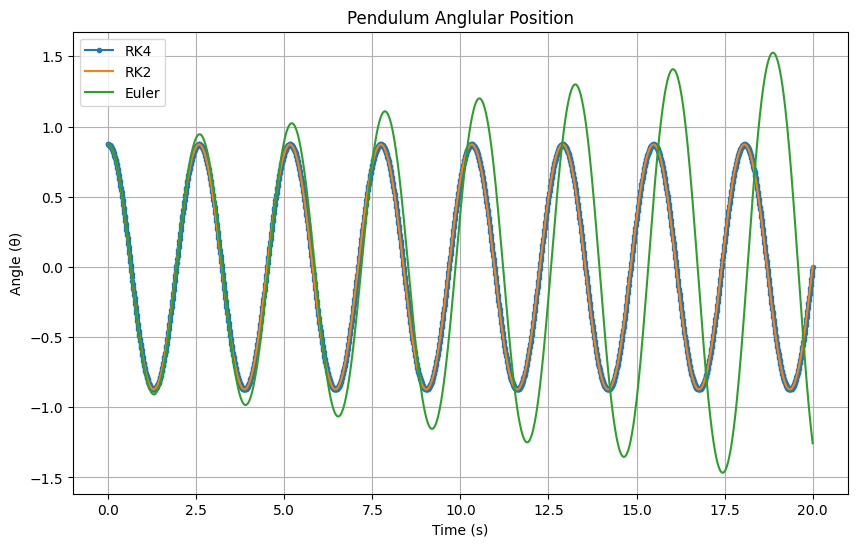

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(t_rk4, theta_rk4, marker='.', label='RK4')
plt.plot(t_rk2, theta_rk2, label='RK2')
plt.plot(t_euler, theta_euler, label='Euler')
plt.xlabel('Time (s)')
plt.ylabel('Angle (θ)')
plt.title('Pendulum Anglular Position')
plt.legend()
plt.grid(True)
plt.show()

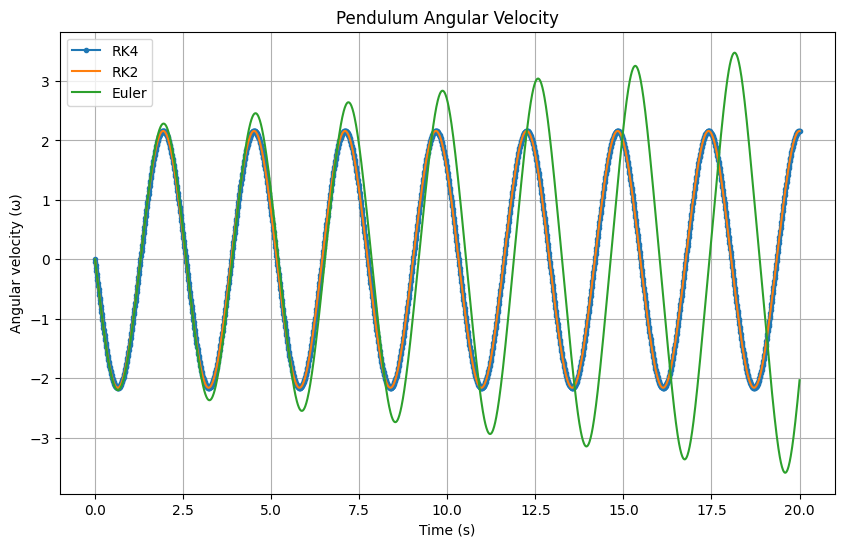

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(t_rk4, omega_rk4,marker='.', label='RK4')
plt.plot(t_rk2, omega_rk2, label='RK2')
plt.plot(t_euler, omega_euler, label='Euler')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (ω)')
plt.title('Pendulum Angular Velocity')
plt.legend()
plt.grid(True)
plt.show()